In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Data (2).csv')
df.head(20)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,3]

In [5]:
x.iloc[:,1:3]=imp.fit_transform(x.iloc[:,1:3])

In [6]:
x.shape

(10, 3)

In [7]:
dic={'Country':str,'Age':int,'Salary':int}
x=x.astype(dic)

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [9]:
ohe=OneHotEncoder(sparse_output=False,dtype=int).set_output(transform='pandas')
ohetransform=ohe.fit_transform(df[['Country']])
ohetransform

,Country_France,Country_Germany,Country_Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [10]:
x=pd.concat([x,ohetransform],axis=1).drop(columns=['Country'])

In [11]:
x

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44,72000,1,0,0
1,27,48000,0,0,1
2,30,54000,0,1,0
3,38,61000,0,0,1
4,40,63777,0,1,0
5,35,58000,1,0,0
6,38,52000,0,0,1
7,48,79000,1,0,0
8,50,83000,0,1,0
9,37,67000,1,0,0


In [12]:
label_y=LabelEncoder()
y=label_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
x1=x.iloc[:,0:2]
x1

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,63777
5,35,58000
6,38,52000
7,48,79000
8,50,83000
9,37,67000


In [15]:
x_new=sc.fit_transform(x1)
x_new

array([[ 7.69734393e-01,  7.49480344e-01],
       [-1.69922498e+00, -1.43817132e+00],
       [-1.26352627e+00, -8.91258402e-01],
       [-1.01663033e-01, -2.53193334e-01],
       [ 1.88802776e-01, -6.38065068e-05],
       [-5.37361746e-01, -5.26649792e-01],
       [-1.01663033e-01, -1.07356271e+00],
       [ 1.35066601e+00,  1.38754541e+00],
       [ 1.64113182e+00,  1.75215402e+00],
       [-2.46895937e-01,  2.93719581e-01]])

In [16]:
x_new=pd.DataFrame(x_new,columns=['Age','Salary'])
x_new

,Age,Salary
0,0.769734,0.749480
1,-1.699225,-1.438171
2,-1.263526,-0.891258
3,-0.101663,-0.253193
4,0.188803,-0.000064
5,-0.537362,-0.526650
6,-0.101663,-1.073563
7,1.350666,1.387545
8,1.641132,1.752154
9,-0.246896,0.293720


In [17]:
merged=pd.concat([x.iloc[:,2:],x_new],axis='columns')
merged

,Country_France,Country_Germany,Country_Spain,Age,Salary
0,1,0,0,0.769734,0.749480
1,0,0,1,-1.699225,-1.438171
2,0,1,0,-1.263526,-0.891258
3,0,0,1,-0.101663,-0.253193
4,0,1,0,0.188803,-0.000064
5,1,0,0,-0.537362,-0.526650
6,0,0,1,-0.101663,-1.073563
7,1,0,0,1.350666,1.387545
8,0,1,0,1.641132,1.752154
9,1,0,0,-0.246896,0.293720


In [18]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [19]:
x1=x.iloc[:,0:2]
x1

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,63777
5,35,58000
6,38,52000
7,48,79000
8,50,83000
9,37,67000


In [20]:
from sklearn.datasets import load_iris

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
iris=load_iris()

In [23]:
x=iris.data
y=iris.target

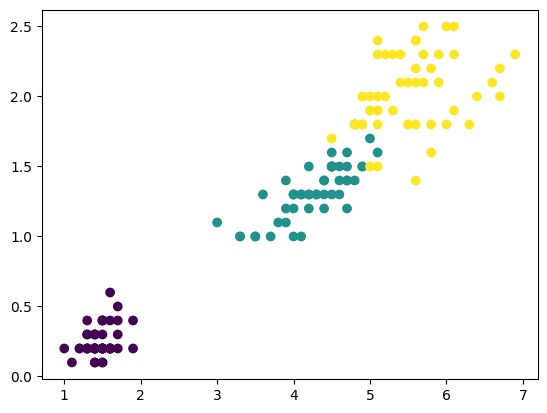

In [24]:
plt.scatter(x[:,2],x[:,3],c=y)
plt.show()

In [25]:
df=pd.DataFrame(x,columns=iris.feature_names)
df['target']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [27]:
import seaborn as sns

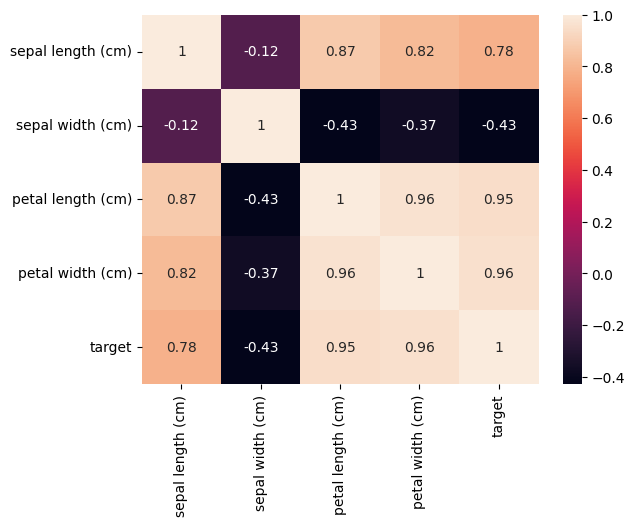

In [28]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf=RandomForestClassifier()
rf.fit(x,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
rf.feature_importances_

array([0.08203226, 0.01897666, 0.46634086, 0.43265022])